In [3]:
function euler_vortex(x, y, time, pars)
    γ  = 1.4
    rc = pars[1]
    ϵ  = pars[2]
    M₀ = pars[3]
    θ  = pars[4]
    x₀ = pars[5]
    y₀ = pars[6]

    r∞ = 1
    u∞ = 1
    E∞ = 1/(γ*M₀^2*(γ - 1)) + 1/2
    p∞ = (γ - 1) * (E∞ - 1/2)
    ubar = u∞ * cos(θ)
    vbar = u∞ * sin(θ)
    f = @. (1 - ((x - x₀) - ubar*time)^2 - ((y - y₀) - vbar*time)^2) / rc^2

    u = @. u∞ * (cos(θ) - ϵ*((y - y₀)-vbar*time) / (2π*rc) * exp(f/2))
    v = @. u∞ * (sin(θ) + ϵ*((x - x₀)-ubar*time) / (2π*rc) * exp(f/2))
    r = @. r∞ * (1 - ϵ^2 * (γ - 1) * M₀^2/(8π^2) * exp(f))^(1/(γ-1))
    p = @. p∞ * (1 - ϵ^2 * (γ - 1) * M₀^2/(8π^2) * exp(f))^(γ/(γ-1))
    
    ru = @. r*u
    rv = @. r*v
    rE = @. p/(γ - 1) + 1/2 * (ru^2 + rv^2) / r
    
    r, ru, rv, rE
end

euler_vortex (generic function with 1 method)

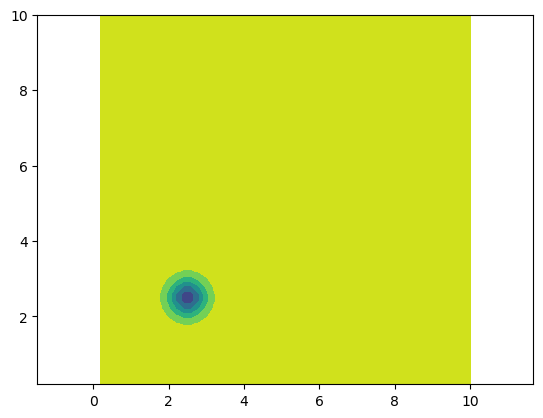

(0.2, 10.0, 0.2, 10.0)

In [4]:
using PyPlot

h = 0.2
s = h:h:10
x = repeat(s, 1, length(s))
y = Matrix(x')

pars = [0.5, 1, 0.5, π/4, 2.5, 2.5]
r, ru, rv, rE = euler_vortex(x, y, 0, pars)

clf()
contourf(x, y, Matrix(r), 0.8:0.03:1.01)
axis("equal")